In [1]:
##bike price prediction 
## linear reg 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

In [3]:
df = pd.read_csv("Used_Bikes.csv")
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [41]:
df["brand"].unique()

array(['TVS', 'Royal Enfield', 'Triumph', 'Yamaha', 'Honda', 'Hero',
       'Bajaj', 'Suzuki', 'Benelli', 'KTM', 'Mahindra', 'Kawasaki',
       'Ducati', 'Hyosung', 'Harley-Davidson', 'Jawa', 'BMW', 'Indian',
       'Rajdoot', 'LML', 'Yezdi', 'MV', 'Ideal'], dtype=object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [5]:
df.isnull().sum()

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [6]:
df.duplicated().sum()

25324

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(7324, 8)

In [9]:
cat_col= df.select_dtypes(include="O")
cat_col

,bike_name,city,owner,brand
0,TVS Star City Plus Dual Tone 110cc,Ahmedabad,First Owner,TVS
1,Royal Enfield Classic 350cc,Delhi,First Owner,Royal Enfield
2,Triumph Daytona 675R,Delhi,First Owner,Triumph
3,TVS Apache RTR 180cc,Bangalore,First Owner,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,Bangalore,First Owner,Yamaha
...,...,...,...,...
9362,Hero Hunk Rear Disc 150cc,Delhi,First Owner,Hero
9369,Bajaj Avenger 220cc,Bangalore,First Owner,Bajaj
9370,Harley-Davidson Street 750 ABS,Jodhpur,First Owner,Harley-Davidson
9371,Bajaj Dominar 400 ABS,Hyderabad,First Owner,Bajaj


In [10]:
num_col = df.select_dtypes(exclude="O")
num_col

,price,kms_driven,age,power
0,35000.0,17654.0,3.0,110.0
1,119900.0,11000.0,4.0,350.0
2,600000.0,110.0,8.0,675.0
3,65000.0,16329.0,4.0,180.0
4,80000.0,10000.0,3.0,150.0
...,...,...,...,...
9362,25000.0,48587.0,8.0,150.0
9369,35000.0,60000.0,9.0,220.0
9370,450000.0,3430.0,4.0,750.0
9371,139000.0,21300.0,4.0,400.0


In [11]:
cat_col.drop("bike_name",axis=1,inplace=True)

In [12]:
cat_col.drop("city",axis=1,inplace=True)

In [13]:
cat_col

,owner,brand
0,First Owner,TVS
1,First Owner,Royal Enfield
2,First Owner,Triumph
3,First Owner,TVS
4,First Owner,Yamaha
...,...,...
9362,First Owner,Hero
9369,First Owner,Bajaj
9370,First Owner,Harley-Davidson
9371,First Owner,Bajaj


In [14]:
##2 ways to change obect data type into numerical 
##1 --- one hot encoding 
##2 Label encoding 

In [15]:
##one hot encoding
pd.get_dummies(cat_col).astype("int")

,owner_First Owner,owner_Fourth Owner Or More,owner_Second Owner,owner_Third Owner,brand_BMW,brand_Bajaj,brand_Benelli,brand_Ducati,brand_Harley-Davidson,brand_Hero,...,brand_LML,brand_MV,brand_Mahindra,brand_Rajdoot,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Triumph,brand_Yamaha,brand_Yezdi
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9362,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9369,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9370,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9371,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df["owner"].value_counts()

owner
First Owner             6642
Second Owner             588
Third Owner               84
Fourth Owner Or More      10
Name: count, dtype: int64

In [17]:
## label encoding 
dt= { "First Owner" : 1,
     
     "Second Owner" : 2,
     
     "Third Owner" : 3,
     
     "Fourth Owner Or More" : 4

}

In [18]:
cat_col["owner"] = cat_col['owner'].map(dt)

cat_col["owner"].value_counts()

owner
1    6642
2     588
3      84
4      10
Name: count, dtype: int64

In [19]:
cat_col

,owner,brand
0,1,TVS
1,1,Royal Enfield
2,1,Triumph
3,1,TVS
4,1,Yamaha
...,...,...
9362,1,Hero
9369,1,Bajaj
9370,1,Harley-Davidson
9371,1,Bajaj


In [20]:
cat_col['brand'].value_counts()

brand
Bajaj              2081
Royal Enfield      1346
Hero               1142
Honda               676
Yamaha              651
TVS                 481
KTM                 375
Suzuki              203
Harley-Davidson      91
Kawasaki             61
Hyosung              53
Mahindra             50
Benelli              46
Triumph              21
Ducati               20
BMW                  10
Jawa                  7
Indian                3
MV                    3
Rajdoot               1
LML                   1
Yezdi                 1
Ideal                 1
Name: count, dtype: int64

In [21]:
{i:key for key , i in enumerate(list(cat_col['brand'].unique()))}

{'TVS': 0,
 'Royal Enfield': 1,
 'Triumph': 2,
 'Yamaha': 3,
 'Honda': 4,
 'Hero': 5,
 'Bajaj': 6,
 'Suzuki': 7,
 'Benelli': 8,
 'KTM': 9,
 'Mahindra': 10,
 'Kawasaki': 11,
 'Ducati': 12,
 'Hyosung': 13,
 'Harley-Davidson': 14,
 'Jawa': 15,
 'BMW': 16,
 'Indian': 17,
 'Rajdoot': 18,
 'LML': 19,
 'Yezdi': 20,
 'MV': 21,
 'Ideal': 22}

In [22]:
dt2 = {'TVS': 0,
 'Royal Enfield': 1,
 'Triumph': 2,
 'Yamaha': 3,
 'Honda': 4,
 'Hero': 5,
 'Bajaj': 6,
 'Suzuki': 7,
 'Benelli': 8,
 'KTM': 9,
 'Mahindra': 10,
 'Kawasaki': 11,
 'Ducati': 12,
 'Hyosung': 13,
 'Harley-Davidson': 14,
 'Jawa': 15,
 'BMW': 16,
 'Indian': 17,
 'Rajdoot': 18,
 'LML': 19,
 'Yezdi': 20,
 'MV': 21,
 'Ideal': 22}

In [23]:
cat_col["brand"] = cat_col["brand"].map(dt2)

cat_col["brand"].value_counts()

brand
6     2081
1     1346
5     1142
4      676
3      651
0      481
9      375
7      203
14      91
11      61
13      53
10      50
8       46
2       21
12      20
16      10
15       7
17       3
21       3
18       1
19       1
20       1
22       1
Name: count, dtype: int64

In [24]:
cat_col

,owner,brand
0,1,0
1,1,1
2,1,2
3,1,0
4,1,3
...,...,...
9362,1,5
9369,1,6
9370,1,14
9371,1,6


In [25]:
complete_df=pd.concat([cat_col,num_col],axis=1)

complete_df.head()

,owner,brand,price,kms_driven,age,power
0,1,0,35000.0,17654.0,3.0,110.0
1,1,1,119900.0,11000.0,4.0,350.0
2,1,2,600000.0,110.0,8.0,675.0
3,1,0,65000.0,16329.0,4.0,180.0
4,1,3,80000.0,10000.0,3.0,150.0


In [26]:
metrix = complete_df.corr()
metrix

,owner,brand,price,kms_driven,age,power
owner,1.000000,0.005844,-0.005188,0.062612,0.203151,0.043746
brand,0.005844,1.000000,0.288409,-0.036161,-0.030263,0.068647
price,-0.005188,0.288409,1.000000,-0.199951,-0.248752,0.807641
kms_driven,0.062612,-0.036161,-0.199951,1.000000,0.367518,-0.168295
age,0.203151,-0.030263,-0.248752,0.367518,1.000000,-0.164211
power,0.043746,0.068647,0.807641,-0.168295,-0.164211,1.000000


<Axes: >

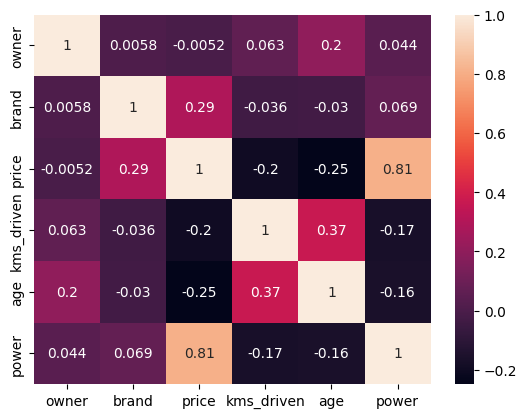

In [27]:
sns.heatmap(metrix,annot=True)

In [28]:
##training and testing 
## x and y 

In [29]:
x= complete_df.drop("price",axis=1)
y = complete_df[["price"]]

In [30]:
x


,owner,brand,kms_driven,age,power
0,1,0,17654.0,3.0,110.0
1,1,1,11000.0,4.0,350.0
2,1,2,110.0,8.0,675.0
3,1,0,16329.0,4.0,180.0
4,1,3,10000.0,3.0,150.0
...,...,...,...,...,...
9362,1,5,48587.0,8.0,150.0
9369,1,6,60000.0,9.0,220.0
9370,1,14,3430.0,4.0,750.0
9371,1,6,21300.0,4.0,400.0


In [31]:
y 

,price
0,35000.0
1,119900.0
2,600000.0
3,65000.0
4,80000.0
...,...
9362,25000.0
9369,35000.0
9370,450000.0
9371,139000.0


In [32]:
##trainig and testing 
##sklearn -- scikit-learn 

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [33]:
##model train

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

In [34]:
from sklearn.ensemble import RandomForestRegressor

rd = RandomForestRegressor()

rd.fit(x_train,y_train)

rd.score(x_train,y_train)


c:\Users\jaikr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9843800516432982

In [35]:
rd.score(x_test,y_test)

0.8980177651588583

In [36]:
## when you have to check how much acc

model.score(x_train,y_train)

0.7053826605671762

In [37]:
model.score(x_test,y_test)

0.7586900869386048

In [38]:
import joblib

In [39]:
joblib.dump(model,"lr_model.lb")

['lr_model.lb']

In [40]:
# joblib.load("lr_model.lb")